In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from brian2 import *
import syncological as sync
from syncological.inputs import create_trials, pad_rate
from syncological import ei5
import os, sys
from fakespikes import neurons, util, rates

In [10]:
seed = 42
stim_seed = seed
conn_seed = seed

# ------------------------------------------------------------
# Model params
name = 'test'

K = 1
scale_noise = 1 # default 4
scale_stim = 4 # default 4
back_rate = 12 # default 12

I_e = 0.3
I_i = 0.0

w_e = 0.0 # 2.00
w_i = 0.00

w_ee = 0.001e3
w_ii = 0.001e3
w_ie = 0.00789269e3
w_ei = 0.002e3

# ------------------------------------------------------------
# Create input
N_stim = 100
n_stim = N_stim

# Load v1 rate data (1 ms resoultion)
dt = 1e-3
v1 = np.load(os.path.join(sync.__path__[0], 'data', 'no_opto_rates.npz'))
stim = v1['rate']
stim_times = v1['times']

# Select 1-3 seconds, the visual stimulation period
m = np.logical_and(stim_times > 1, stim_times <= 3)
stim = stim[m]
stim_times = stim_times[m]

# Renorm stim_times to 0 + 0.1 s
stim_times -= stim_times.min()
stim, stim_times = pad_rate(0.1, stim, stim_times, dt)

# Create Poisson firing, mocking up
# the stimulus.
time = stim_times.max()
nrns = neurons.Spikes(n_stim, time, dt=dt, seed=stim_seed)
spks_stim = nrns.poisson(scale_stim * stim)

ns, ts = util.to_spiketimes(nrns.times, spks_stim)     
ns, ts = create_trials(K, 0, ns, ts)

# ------------------------------------------------------------
# Run
results = ei5.model(
    name, time, K,
    N_stim, ts, ns, 
    w_e, w_i, w_ei, w_ie, w_ee, w_ii,
    I_e=I_e, I_i=I_i,
    scale_noise=scale_noise,
    back_rate=back_rate,
    verbose=True,
    save=True,
    parallel=False,
    seed=seed,
    conn_seed=conn_seed
)

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4999 but corresponding boolean dimension is 5000
 [py.warnings]


test
>>> Trial 0
Starting simulation at t=0. s for a duration of 2.09939988 s
77.86 ms (3%) simulated in 10s, estimated 4m 20s remaining.
155.62 ms (7%) simulated in 20s, estimated 4m 10s remaining.
234.09 ms (11%) simulated in 30s, estimated 3m 59s remaining.
312.88 ms (14%) simulated in 40s, estimated 3m 48s remaining.
0.39073 s (18%) simulated in 50s, estimated 3m 39s remaining.
0.46952 s (22%) simulated in 1m 0s, estimated 3m 28s remaining.
0.54771 s (26%) simulated in 1m 10s, estimated 3m 18s remaining.
0.62622 s (29%) simulated in 1m 20s, estimated 3m 8s remaining.
0.70292 s (33%) simulated in 1m 30s, estimated 2m 59s remaining.
0.77669 s (36%) simulated in 1m 40s, estimated 2m 50s remaining.
0.82893 s (39%) simulated in 1m 50s, estimated 2m 49s remaining.
0.89714 s (42%) simulated in 2m 0s, estimated 2m 41s remaining.
0.95279 s (45%) simulated in 2m 10s, estimated 2m 36s remaining.
1.01977 s (48%) simulated in 2m 20s, estimated 2m 28s remaining.
1.08307 s (51%) simulated in 2m 3

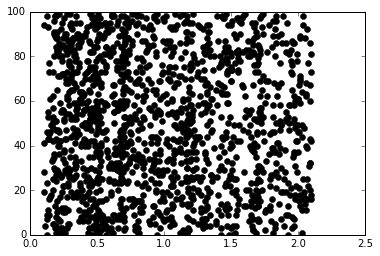

In [11]:
# plot stim, confirming trials are correct
plt.plot(ts, ns, 'ko')

In [12]:
# ------------------------------------------------------------
# Unpack results
sel = 0  # choose a trial number to plot

# --
result = results[sel]
spikes_e = result['spikes_e']
spikes_i = result['spikes_i']
spikes_stim = result['spikes_stim']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']

ts_e = spikes_e.t_[:]
ts_stim = spikes_stim.t_[:]

ns_e = spikes_e.i_[:]
ns_stim = spikes_stim.i_[:]

ts_i = spikes_i.t_[:]
ns_i = spikes_i.i_[:]

v_e = traces_e.V_[:]
v_i = traces_i.V_[:]

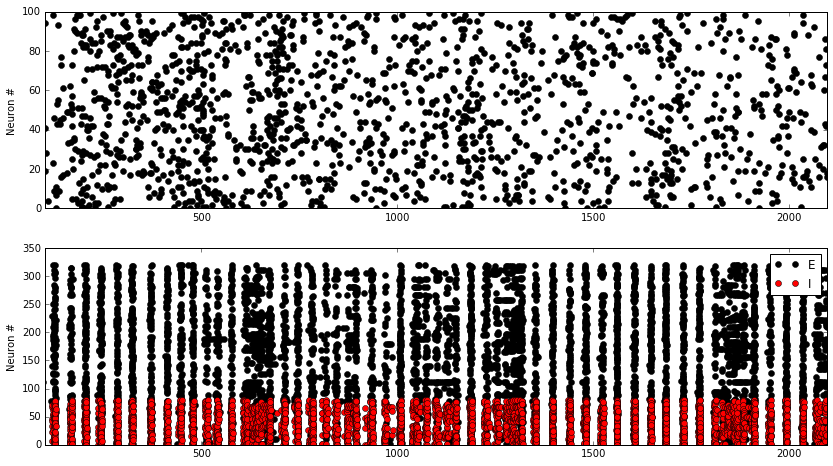

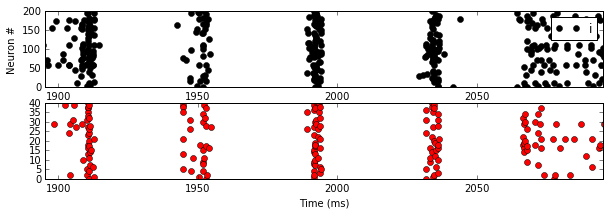

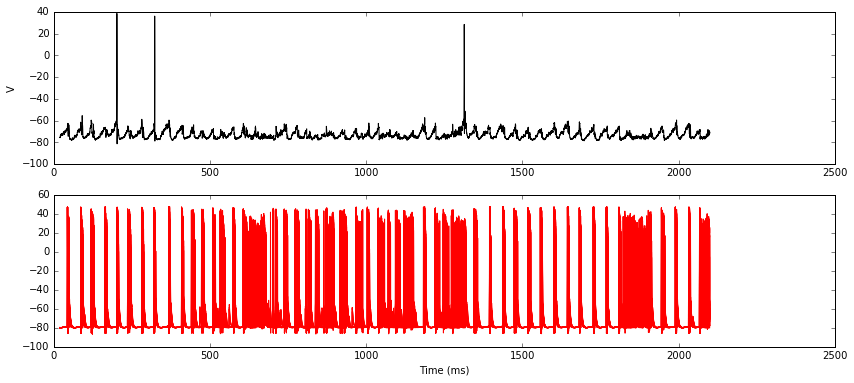

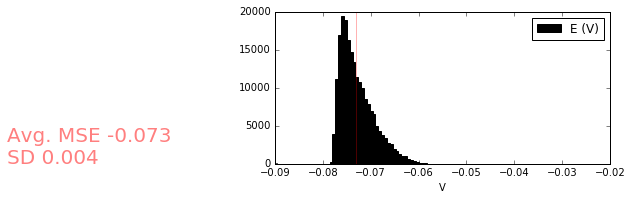

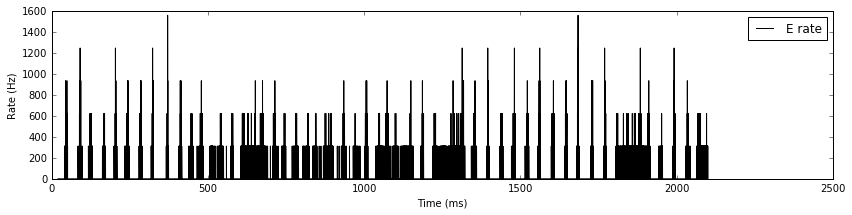

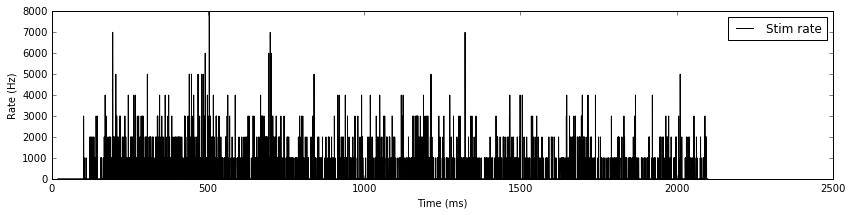

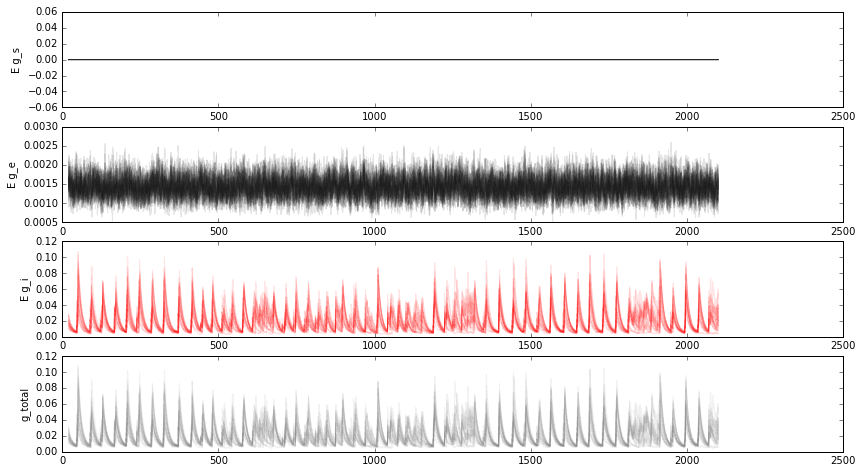

In [13]:
# ------------------------------------------------------------
# Raster full
close()
t_min = spikes_stim.t_[:].min() 
t_max = spikes_stim.t_[:].max()

figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[0, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))

subplot(211)
M = np.round(np.mean(traces_e.V_[0][tn:]), 3)
SD = np.round(np.std(traces_e.V_[0][tn:]), 3)
hist(traces_e.V_[0][tn:], label='E (V)', color='k', bins=100, range=(-90e-3, -30e-3))
plt.axvline(x=M, color="red", alpha=0.3)
plt.text(2*M, 0, "Avg. MSE {}\nSD {}".format(M, SD), color="r", fontsize=20, alpha=0.5)
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, color='k', alpha=0.1)
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, color='k', alpha=0.1)
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, color='r', alpha=0.1)
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_e.g_e[1:20, tn:].T + traces_e.g_i[1:20, tn:].T, color='grey', alpha=0.1)
ylabel("g_total")
# legend(loc='best')

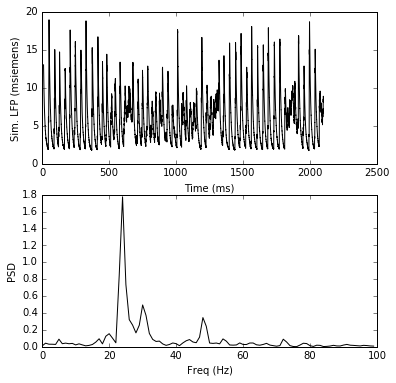

In [14]:
# # ------------------------------------------------------------
# # Spectra
lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
lfp = lfp[1000:]  # Drop initial spike

figure(figsize=(6,6))
subplot(211)
plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
xlabel("Time (ms)")
ylabel("Sim. LFP (msiemens)")

subplot(212)
fs, spec = util.create_psd(lfp, 1/result['dt'])
plot(fs[fs < 100], spec[fs < 100], color='k')
xlabel("Freq (Hz)") 
ylabel("PSD")

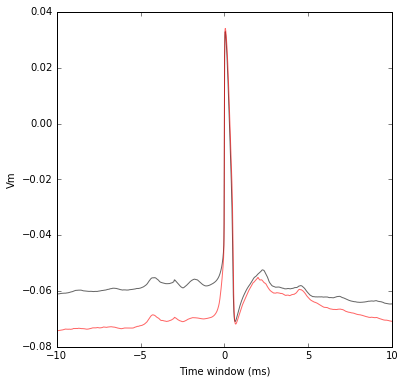

In [15]:
# # ------------------------------------------------------------
# STA
figure(figsize=(6,6))
sta_e, bins_sta_e = util.spike_triggered_average(ts_e, ns_e, v_e, (0, time), 10e-3, 1/1e-5)
sta_i, bins_sta_i = util.spike_triggered_average(ts_i, ns_i, v_i, (0, time), 10e-3, 1/1e-5)

plt.plot(bins_sta_e*1000, sta_e, color='k', alpha=0.6)
plt.plot(bins_sta_i*1000, sta_i, color='r', alpha=0.6)
plt.xlabel("Time window (ms)")
plt.ylabel("Vm")

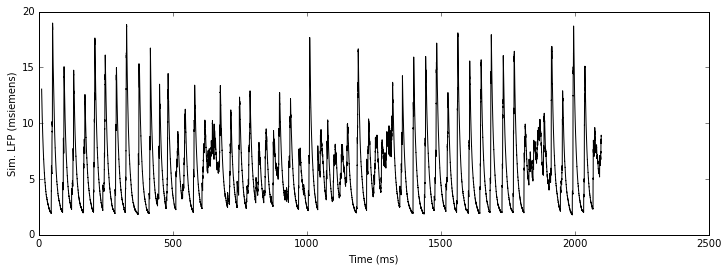

In [16]:
# ---------------------------------
# plot all K lfps
lfps = []
for res in results:
    t_e = res['traces_e']
    t_i = res['traces_i']
    
    lfp = (np.abs(t_e.g_s.sum(0)) + np.abs(t_e.g_ee.sum(0)) + np.abs(t_e.g_i.sum(0)))
    lfp = lfp[1000:]  # Drop initial spike
    lfps.append(lfp)
    
figure(figsize=(12, 4))
for i, lfp in enumerate(lfps):
    subplot(len(lfps), 1, i + 1)
    plot(traces_e.t[1000:]/ms, lfp, color='k', label=i)
xlabel("Time (ms)")
ylabel("Sim. LFP (msiemens)")